<center><h1>Méthode des éléments finis de type Petrov-Galerkin pour un problème d'advection-diffusion en dimension 1 </h1></center>
<center><h3> Olivier BOUËT-WILLAUMEZ </h3></center>
<center><h4> Équations de transport, M2 MMA </h4></center>
<center><h4> Université Paris Cité, 2023-2024 </h4></center>


*Ce projet a été proposé par Mme Marcela Szopos dans le cadre de l'UE Équations de Transport du M2 MMA à l'Université Paris Cité.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

On considère le problème d’advection-diffusion suivant: 
$$ \left \{
\begin{array}{l @{=} l}
    -\nu u''+ \beta u' = 1, \ si \ x\in \Omega=]0,1[ \\
    u(0)=u(1)=0, \ sinon
\end{array}
\right.$$

où $\nu$ et $\beta$ sont deux constantes réelles strictement positives. Le terme $-\nu u''$ correspond à la diffusion, le
terme $\beta u'$ à l'advection et le membre de droite = 1 représente le terme source.



Nous appelerons ce problème __(0.1)__ par la suite pour y faire référence plus facilement.

 **(1)** Calculer la solution exacte du problème __(0.1)__.


_**<u>Étape 1:</u>**_ Résolution de l'équation homogène: $ -\nu u''+ \beta u' = 0$

Pour cela, on introduit le polynôme caractéristique: $ -\nu x^2+ \beta x$.

On a que: $$\begin{equation}
-\nu x^2+ \beta x = 0 \\
ssi \ x(\beta -\nu x)=0 \\
ssi \ x=0 \ ou \ x=\frac{\beta}{\nu} \\
\end{equation}$$

Les solutions de l'équation homogène sont donc les fonctions de la forme: $f_h:x\mapsto \lambda_1 + \lambda_2 e^{\frac{\beta}{\nu}x}$, avec $\lambda_1,\lambda_2 \in \mathbf{R}$.

_**<u>Étape 2:</u>**_ Recherche d'une solution particulière:

On peut remarquer que: $-\nu u''+ \beta u' = 1$ est de la forme $-\nu u''+ \beta u' = 1*e^{0*x}$, avec $x_1=0$ racine du polynôme caractéristique trouvé précédemment à l'étape 1.

Une solution particulière de notre équation différentielle est alors de  la forme: $f_p:x\mapsto Cx$, avec $C \in \mathbf{R}$, et vérifie $f_p'=C$ ainsi que $f_p''=0$. Il vient alors, après injection dans l'équation différentielle de départ, que  $\beta*C=1$ soit $C=\frac{1}{\beta}$.

Une solution particulière est alors de la forme: $f_p:x\mapsto \frac{x}{\beta}$.

_**<u>Étape 3:</u>**_ Solution générale du problème __(0.1)__:

La solution générale du problème est de la forme: $f_g:x\mapsto \lambda_1 + \lambda_2 e^{\frac{\beta}{\nu}x} +\frac{x}{\beta}$, avec $\lambda_1,\lambda_2 \in \mathbf{R}$.

En utilisant les conditions aux bords du problème ($f_g(0)=f_g(1)=1$), on trouve alors après quelques calculs, laissés au lecteur, que $\lambda_1=\frac{1}{\beta e^{\frac{\beta}{\nu}}-1}$, et $\lambda_2=-\frac{1}{\beta e^{\frac{\beta}{\nu}}-1}$.

Pour conclure la solution générale du problème **(0.1)** est la fonction:$$f_g:x\mapsto \frac{1}{\beta e^{\frac{\beta}{\nu}}-1} -\frac{1}{\beta e^{\frac{\beta}{\nu}}-1} e^{\frac{\beta}{\nu}x} +\frac{x}{\beta}$$

Définissons des fonctions `cste` et `f` qui permettent d'implémenter la solution exacte du problème **(0.1)**.

In [2]:
def cste(beta,nu):
    return 1/(beta*np.exp(beta/nu)-1)

In [3]:
def f(x,beta,nu):
    return cste(beta,nu)-cste(beta,nu)*np.exp((beta/nu)*x)+(1/beta)*x

**(2)** Représenter graphiquement la solution exacte pour $\beta= 1$, $\nu= 1$, $0.1$, $0.01$. Remarquer l’apparition d'une couche limite en $x = 1$. Proposer une estimation de l'épaisseur de cette couche limite comme fonction de $\nu$ et $\beta$ lorsque $\frac{\beta}{\nu}$ est grand.

Représentation graphique des solutions exactes pour $\beta=1$ et $\nu = 5,1,0.1,0.01$.

In [4]:
# Définition des paramètres 
beta=1
nu=[5,1,0.1,0.01]

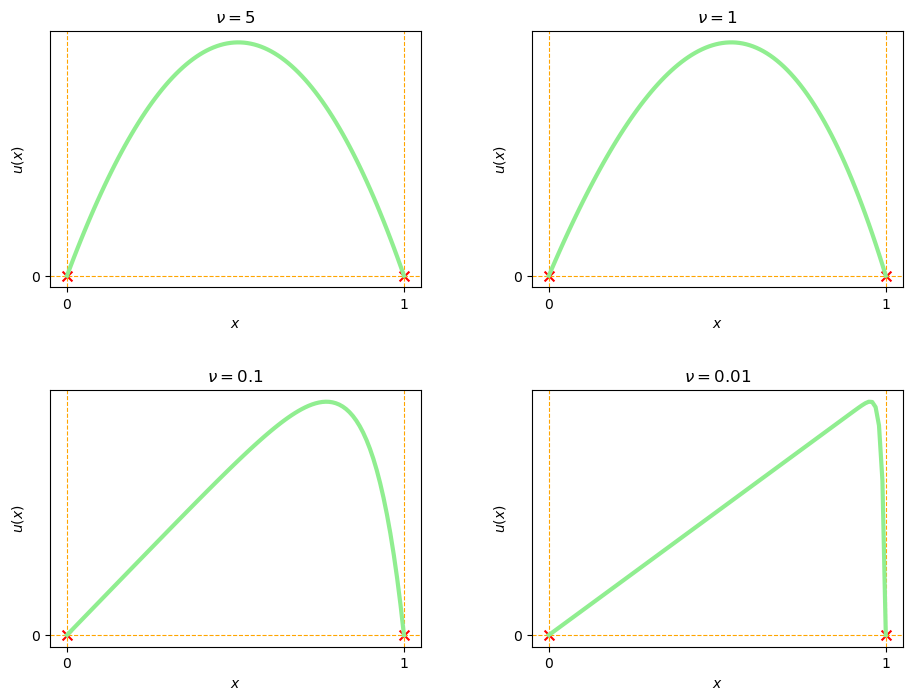

In [5]:
# Affichage et tracé des solutions exactes
x=np.linspace(0,1,100)

fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(11,8))

for i in range(4):
    
    plt.subplot(2,2,i+1)
    plt.plot(x,f(x,beta,nu[i]),label=r'$\nu=$'+str(nu[i]),color="lightgreen",linewidth=3)
    plt.title(r'$\nu=$'+str(nu[i]))
    plt.grid(True,color='orange', linestyle='--')
    plt.scatter(0,0,color="red",s=50,marker="x")
    plt.scatter(1,0,color="red",s=50,marker="x")
    plt.ylabel("$u(x)$")
    plt.xlabel("$x$")
    plt.xticks([0,1], [0,1])
    plt.yticks([0],[0])

plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

**(3)** Proposer une formulation variationnelle de **(0.1)** et montrer que le problème est bien posé dans $H^1_0(\Omega)$.

On pose $V= \big \{ v\in \mathcal{C}^1([0,1]) ,\ v(0)=v(1)=0 \big \}$.

Soit $ u\in V\cap \mathcal{C}^2([0,1])$ et $ v\in V$ arbitraire.

En multipliant des deux côtés de l'équation **(0.1)** par $v$ puis en intégrant entre $0$ et $1$, on obtient:

$$\begin{equation}
\int_{0}^{1} [-\nu u''(x)+\beta u'(x)]v(x)dx = \int_{0}^{1}v(x)dx
\end{equation}$$

À l'aide d'une IPP, le membre de gauche devient: $\int_{0}^{1}\nu u'(x)v'(x)dx -[\nu v(x)u'(x)]^{1}_{0} + \int_{0}^{1}\beta u'(x)v(x)dx$. Comme $ v\in V$, on a que $[\nu v(x)u'(x)]^{1}_{0}=0$.

Donc si $u$ est solution de **(0.1)**, $u$ vérifie:

$$(FV) \  \begin{equation}
\int_{0}^{1} [\nu u'(x)v'(x)+\beta u'(x)v(x)]dx = \int_{0}^{1}v(x)dx, \ \forall v \in V
\end{equation}$$

On souhaite maintenant calculer une solution approchée du problème **(0.1)** à l'aide de la méthode des éléments finis $P^1$
sur un maillage uniforme de pas $h =\frac{1}{N+1}$ . On note $\{\Phi_1,\dots,\Phi_N \}$ la base
classique des fonctions “chapeau” dans $V_h$. 

On définit $\Phi_{i}^{h}: [0,1] \to R$ par : $$\Phi_{i}^{h}(x) = \left \{
\begin{array}{l @{=} l}
    \frac{x-x_{i-1}}{h}, \ si \ x\in [x_{i-1},x_i] \\
    \frac{x_{i+1}-x}{h}, \ si \ x\in [x_{i},x_{i+1}] \\
    0 , \ sinon
\end{array}
\right.$$

Les dérivées faibles sont données par: $$ (\Phi_{i}^{h})'(x) = \left \{
\begin{array}{l @{=} l}
    \frac{1}{h}, \ si \ x\in [x_{i-1},x_i] \\
    \frac{-1}{h}, \ si \ x\in [x_{i},x_{i+1}] \\
    0 , \ sinon
\end{array}
\right.$$

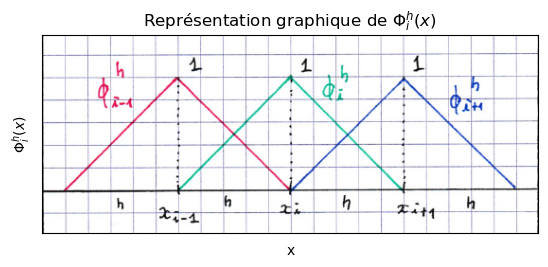

In [6]:
# Représentation graphique de Phi via ce code et un schéma fait à la main.

img = plt.imread('base des Phi_h.png')
plt.title("Représentation graphique de "+r'$\Phi_{i}^{h}(x)$')
plt.xticks([],[])
plt.ylabel(r'$\Phi_{i}^{h}(x)$')
plt.xlabel(r'x')
plt.yticks([],[])
plt.imshow(img)
plt.show()

La solution $u_h$ est obtenue en résolvant le problème suivant: trouver $u_h \in V_h$ tq $\forall v_h \in V_h$ on ait : 

$$\begin{equation}
a(u_h,v_h) = \int_{0}^{1}v_h = l(v_h)
\end{equation}$$ 

_**<u>Existence de la solution dans $H^1_0(\Omega)$:</u>**_

En appliquant le théorème de *Lax-Milgram* dans $H^1_0(\Omega)$ à la forme bilinéaire continue et coercive $a(u,v)= \int_{0}^{1} [\nu u'(x)v'(x)+\beta u'(x)v(x)]dx$ et à la forme linéaire continue $l(v)=\int_{0}^{1}v(x)dx$, on obtient l'existence d'une fonction $u$ solution faible du problème.
    
- $a$ est clairement bilinéaire et $l$ est clairement linéaire.
    
<u>Preuve que $a$ est continue:</u> Soient $(u,v) \in H^1_0(\Omega)\times H^1_0(\Omega)$.
$$\begin{equation}
\begin{split}
|a(u,v)| & \leq \nu \int_{0}^{1}|u'(x)v'(x)|dx +\beta \int_{0}^{1}|u'(x)v(x)|dx \\
         & \leq \nu \big{(}\int_{0}^{1}|u'(x)|^2 dx\big{)}^\frac{1}{2}\big{(}\int_{0}^{1}|v'(x)|^2 dx\big{)}^\frac{1}{2}+\beta \big{(}\int_{0}^{1}|u'(x)|^2 dx\big{)}^\frac{1}{2}\big{(}\int_{0}^{1}|v(x)|^2 dx\big{)}^\frac{1}{2} \\
         & \leq \big{(}\int_{0}^{1}|u'(x)|^2 dx\big{)}^\frac{1}{2}\big{(}\nu \big{(}\int_{0}^{1}|v'(x)|^2 dx\big{)}^\frac{1}{2}+ \beta \big{(}\int_{0}^{1}|v(x)|^2 dx\big{)}^\frac{1}{2}\big{)} \\
         & = \big{(}||u'||_{L^2}\big{)}\big{(}\nu \big{(}\int_{0}^{1}|v'(x)|^2 dx\big{)}^\frac{1}{2}+ \beta \big{(}\int_{0}^{1}|v(x)|^2 dx\big{)}^\frac{1}{2}\big{)} \\
         & \leq \big{(}||u||_{H^1_0(\Omega)}\big{)}(\nu^2+\beta^2)^\frac{1}{2}\big{(}\int_{0}^{1}|v'(x)|^2 +|v(x)|^2 dx\big{)}^\frac{1}{2} \\
         & \leq (\nu^2+\beta^2)^\frac{1}{2}||u||_{H^1_0(\Omega)}||v||_{H^1_0(\Omega)}
\end{split} 
\end{equation}$$ 

d'où la continuité.

L'avant dernière inégalité se justifie par le fait que $ A^\frac{1}{2}B^\frac{1}{2} + C^\frac{1}{2}D^\frac{1}{2} \leq (A+C)^\frac{1}{2}(B+D)^\frac{1}{2}$.

    
<u>Preuve que $a$ est coercive:</u>  Soit $u \in H^1_0(\Omega)$.
$$\begin{equation}
\begin{split}
a(u,u) & = \int_{0}^{1}\nu (u'(x))^2dx +\int_{0}^{1}\beta u'(x)u(x)dx \\
       & = \int_{0}^{1}\nu (u'(x))^2dx +\beta[\frac{u^2(x)}{2}]_0^1 \\
       & = \nu \int_{0}^{1} (u'(x))^2dx \\
       & = \nu \big{(}\frac{1}{2}\int_{0}^{1} (u'(x))^2dx +\frac{1}{2}\int_{0}^{1} (u'(x))^2dx\big{)}\\
       & \geq \frac{\nu}{2}min(1,C_\Omega)\big{(}||u'||^2_{L^2}+||u||^2_{L^2}\big{)}\\
       & = C||u||^2_{H^1_0(\Omega)}
\end{split} 
\end{equation}$$

Car d'après l'inégalité de Poincaré, $\frac{1}{2}\int_{0}^{1} (u'(x))^2dx \geq C_\Omega||u||^2_{L^2}$.

<u>Preuve que $l$ est continue:</u> Soit $v \in H^1_0(\Omega)$.
$$\begin{equation}
\begin{split}
|l(v)| & = \big{|}\int_{0}^{1}1\times v(x)dx \ \big{|}\\
       & \leq \int_{0}^{1}|1|\times |v(x)|dx \ \\
       & \leq ||v||_{L^2} \\
       & \leq ||v||_{H^1_0(\Omega)}
\end{split} 
\end{equation}$$

On peut donc bien appliquer le théorème de *Lax-Milgram* dans notre cas.

**(4)** On introduit le nombre de _Péclet_ $\ \gamma = \frac{h\beta}{\nu}$. En écrivant la formulation matricielle associée à ce
problème, déterminer la matrice $A_h$ et le vecteur $\mathcal{b}_h$ associés.

On définit $V_h = \big \{ v_h \in \mathcal{C}^0([0,1]) ,v_h\vert_{[x_i,x_{i+1}]}=a_i+b_ix,\ (a_i,b_i)\in R^2, 1 \leq i \leq N, \  v_h(0)=v_h(1)=0 \big \}$.

Si $u_h \in V_h$, alors $u_h$ s'écrit de la forme: $ u_h = \sum\limits_{j=1}^{N}U_{j}^{h}\Phi_{j}^{h}$, car 
$\{\Phi_1,\dots,\Phi_N \}$ est une base de $V_h$.

On sait d'après la question précédente que $a(u_h,v_h)=l(v_h), \forall v_h \in V_h$, en particulier, comme $\Phi_{j}^{h} \in V_h$, $ \forall 1 \leq j \leq N$, on a alors: 

$$\begin{equation}
a\big{(}\sum\limits_{j=1}^{N}U_{j}^{h}\Phi_{j}^{h},\Phi_{i}^{h}\big{)} = l(\Phi_{i}^{h}), \ \forall 1 \leq i,j \leq N
\end{equation}$$ 

ce qui implique, par bilinéarité de $a$ que:  $$\begin{equation}
\sum\limits_{j=1}^{N}U_{j}^{h} a(\Phi_{j}^{h},\Phi_{i}^{h}) = l(\Phi_{i}^{h}), \ \forall 1 \leq i,j \leq N
\end{equation}$$ 

En définissant $ U_h= (U_{j}^{h})_{1 \leq j \leq N}$, $A_h=\big{(}a(\Phi_{j}^{h},\Phi_{i}^{h})\big{)}_{1 \leq i,j \leq N}$ ainsi que $b_h=(l(\Phi_{i}^{h}))_{1 \leq i \leq N}$, le problème initial se ramène à la résolution d'un système linéaire de taille $N$ de la forme $A_hU_h=b_h$, que l'on appelle formulation matricielle du problème **(0.1)**.

On peut alors trouver les coefficients de $A_h$ de la façon suivante:

$$\begin{equation}
\begin{split}
(A_h)_{i,j} & = \int_{0}^{1} [\nu (\Phi_{j}^{h})'(x)(\Phi_{i}^{h})'(x)+\beta (\Phi_{j}^{h})'(x)(\Phi_{i}^{h})(x)]dx \\
            & = 0, \ si \ |i-j|>1
\end{split}
\end{equation}$$

car les supports de $\Phi_{j}^{h} $ et $ \Phi_{i}^{h}$ ainsi que $(\Phi_{j}^{h})' $ et $(\Phi_{i}^{h})'$ sont disjoints dans ce cas.

Cela nous informe alors sur le fait que la matrice $A_h$ est tridiagonale, calculons ses coefficients:

_**<u>Calcul des coefficients diagonaux de $A_h$:</u>**_
$$\begin{equation}
\begin{split}
(A_h)_{i,i} & = \int_{0}^{1} [\nu (\Phi_{i}^{h})'(x)(\Phi_{i}^{h})'(x)+\beta (\Phi_{i}^{h})'(x)(\Phi_{i}^{h})(x)]dx \\
            & = \int_{x_{i-1}}^{x_i}(\nu \frac{1}{h^2} + \beta \frac{1}{h} \frac{x-x_{i-1}}{h}) dx + \int_{x_{i}}^{x_{i+1}}(\nu \frac{1}{h^2} - \beta \frac{1}{h} \frac{x_{i+1}-x}{h}) dx \\
            & = \frac{\nu}{h^2}[x]_{x_{i-1}}^{x_i} + \frac{\beta}{2 h^2}[(x-x_{i-1})^2]_{x_{i-1}}^{x_i} + \frac{\nu}{h^2}[x]_{x_{i}}^{x_{i+1}} + \frac{\beta}{2 h^2}[(x_{i+1}-x)^2]_{x_{i}}^{x_{i+1}} \\
            & = \frac{\nu}{h} + \frac{\beta}{2} + \frac{\nu}{h} - \frac{\beta}{2} \\
            & = \frac{2 \nu}{h}
\end{split}
\end{equation}$$

Les coefficients diagonaux de $A_h$ valent $\frac{2 \nu}{h}$.

_**<u>Calcul des coefficients sur-diagonaux de $A_h$:</u>**_
$$\begin{equation}
\begin{split}
(A_h)_{i-1,i} & = \int_{x_{i-1}}^{x_{i}} [\nu (\Phi_{i}^{h})'(x)(\Phi_{i-1}^{h})'(x)+\beta (\Phi_{i}^{h})'(x)(\Phi_{i-1}^{h})(x)]dx \\
              & = \int_{x_{i-1}}^{x_{i}} [\nu \frac{1}{h} \frac{-1}{h} +\beta \frac{1}{h} \frac{x_{i}-x}{h}]dx \\   
              & = -\frac{\nu}{h^2}[x]_{x_{i-1}}^{x_i} -\frac{\beta}{2 h^2}[(x_i-x)^2]_{x_{i-1}}^{x_i}\\
              & = -\frac{\nu}{h} +\frac{\beta}{2}
\end{split}
\end{equation}$$

Les coefficients sur-diagonaux de $A_h$ valent $-\frac{\nu}{h} +\frac{\beta}{2}$.

_**<u>Calcul des coefficients sous-diagonaux de $A_h$:</u>**_
$$\begin{equation}
\begin{split}
(A_h)_{i+1,i} & = \int_{x_{i}}^{x_{i+1}} [\nu (\Phi_{i}^{h})'(x)(\Phi_{i+1}^{h})'(x)+\beta (\Phi_{i}^{h})'(x)(\Phi_{i+1}^{h})(x)]dx \\
              & = \int_{x_{i}}^{x_{i+1}} [\nu \frac{-1}{h} \frac{1}{h} +\beta \frac{-1}{h} \frac{x-x_i}{h}]dx \\   
              & = -\frac{\nu}{h^2}[x]_{x_{i}}^{x_{i+1}} -\frac{\beta}{2 h^2}[(x-x_i)^2]_{x_{i}}^{x_{i+1}} \\
              & = -\frac{\nu}{h} -\frac{\beta}{2}
\end{split}
\end{equation}$$

Les coefficients sous-diagonaux de $A_h$ valent $-\frac{\nu}{h} -\frac{\beta}{2}$.

_**<u>Calcul des coefficients de $b_h$:</u>**_
$$\begin{equation}
\begin{split}
(b_h)_i & = l(\Phi_{i}^{h}) \\
        & = \int_{0}^{1}\Phi_{i}^{h}(x)dx \\
        & = \int_{x_{i-1}}^{x_i}\frac{x-x_{i-1}}{h}dx + \int_{x_i}^{x_{i+1}}\frac{x_{i+1}-x}{h}dx \\
        & = \frac{1}{2 h}[x^2]_{x_{i-1}}^{x_i} -\frac{1}{2 h}[x^2]_{x_i}^{x_{i+1}} -\frac{1}{h}x_{i-1}[x]_{x_{i-1}}^{x_i} +\frac{1}{h}x_{i+1}[x]_{x_i}^{x_{i+1}} \\
        & = h 
\end{split}
\end{equation}$$

Les coefficients de $b_h$ valent tous $h$.

Pour conclure, on a donc:
$$A_h=\begin{pmatrix}
\frac{2 \nu}{h}&-\frac{\nu}{h} +\frac{\beta}{2}&0&\dots&0\\
-\frac{\nu}{h} -\frac{\beta}{2}&\ddots&\ddots&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&\ddots&\ddots&-\frac{\nu}{h} +\frac{\beta}{2}\\
0&\dots&0&-\frac{\nu}{h} -\frac{\beta}{2}&\frac{2 \nu}{h}
\end{pmatrix},b_h=\begin{pmatrix}h\\\vdots\\\vdots\\\vdots\\h\end{pmatrix}$$

**(5)** Pour $\beta= 1$ et $h = 0.01$, donner une représentation graphique de la solution approchée pour des valeurs de $\nu$ correspondant à $\gamma = 1$ et $\gamma= 5$. Tester différentes valeurs de $\gamma$ pour déterminer un seuil d’instabilité.

D'après la dernière question le nombre de Péclet est donné par $\gamma = \frac{h\beta}{\nu}$, il vient que $\nu=\frac{h\beta}{\gamma}$. 

De la même façon, $h=\frac{1}{N+1}$ donc $N$ est donné par la relation $N=\frac{1-h}{h}$.

Implémentons maintenant une première fonction `sol_approx` qui nous retourne la solution approchée `U_h`pour des valeurs de $h$, $\beta$ et $\gamma$ données.

In [7]:
def sol_approx(h,beta,gamma):

    # Définition des valeurs des paramètres
    h=h
    N=int((1-h)/h)
    beta=beta
    gamma=gamma
    nu=h*beta/gamma

    # Implémentation de la matrice A_h et du vecteur b_h
    b_h=h*np.ones((N))

    # Coefficient diagonal de la matrice A_h
    a_N=(2*nu)/h 

    # Coefficients sur/sous diagonaux de la matrice A_h
    b_N1=-(nu/h)-(beta/2)
    b_N2=-(nu/h)+(beta/2)

    # Initialisation de la matrice A_h et de la solution U_h
    A_h=a_N*np.eye(N)
    U_h=np.zeros(N+2)

    # Conditions aux bords de Dirichlet homogènes
    U_h[0]=0
    U_h[N+1]=0

    # Remplissage de la matrice A_h
    for i in range(1,N-1):
        A_h[i,i-1]=b_N1
        A_h[i,i+1]=b_N2

    A_h[0,1]= b_N2
    A_h[N-1,N-2]=b_N1

    # Résolution de A_h@U_h=b_h à l'intérieur du domaine ]0,1[
    U_h[1:-1]=np.linalg.solve(A_h,b_h)
    
    return U_h

Dans un premier temps, on affiche les solutions approchées pour des valeurs de $\nu$ correspondant à $\gamma = 1$ et $\gamma= 5$.

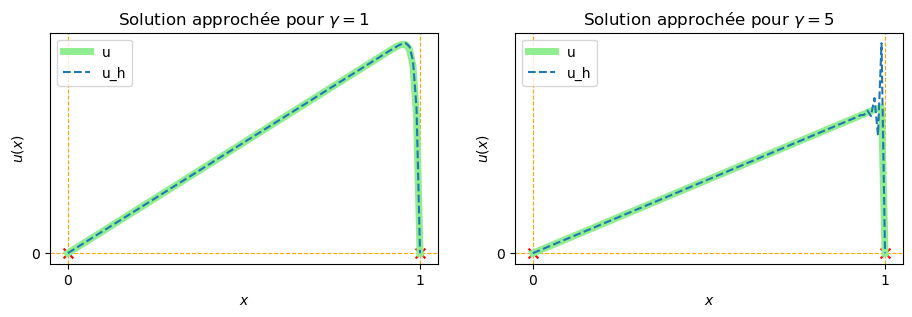

In [8]:
# h et beta fixés
h=0.01
beta=1
N=int((1-h)/h)

# Discrétisation de l'intervalle ]0,1[
x=np.linspace(0,1,N+2)

# Vecteur de valeurs de gamma et valeurs de nu associées
gamma_vect=[1,5]
nu=[h*beta/1,h*beta/5]

# Affichages des solutions approchées pour ces valeurs de gamma

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(11,3))

for i in range(2):

    plt.subplot(1,2,i+1)
    plt.plot(x,f(x,beta,nu[i]),label="u",color="lightgreen",linewidth=5)
    plt.plot(x,sol_approx(h,beta,gamma_vect[i]),label="u_h",linestyle='dashed')
    plt.legend()
    plt.title("Solution approchée pour "+r'$\gamma=$'+str(gamma_vect[i]))
    plt.grid(True,color='orange', linestyle='--')
    plt.scatter(0,0,color="red",s=50,marker="x")
    plt.scatter(1,0,color="red",s=50,marker="x")
    plt.ylabel("$u(x)$")
    plt.xlabel("$x$")
    plt.xticks([0,1], [0,1])
    plt.yticks([0],[0])

plt.subplots_adjust(hspace=1)
plt.show()

On constate que pour $\gamma= 5$, la solution approchée semble instable aux alentours de $x=1$, ce qui n'est pas le cas pour $\gamma=1$ où la solution approchée estime parfaitement notre solution exacte. Nous allons alors tester différentes valeurs de $\gamma$ désormais pour trouver un seuil à partir duquel la solution approchée devient instable.

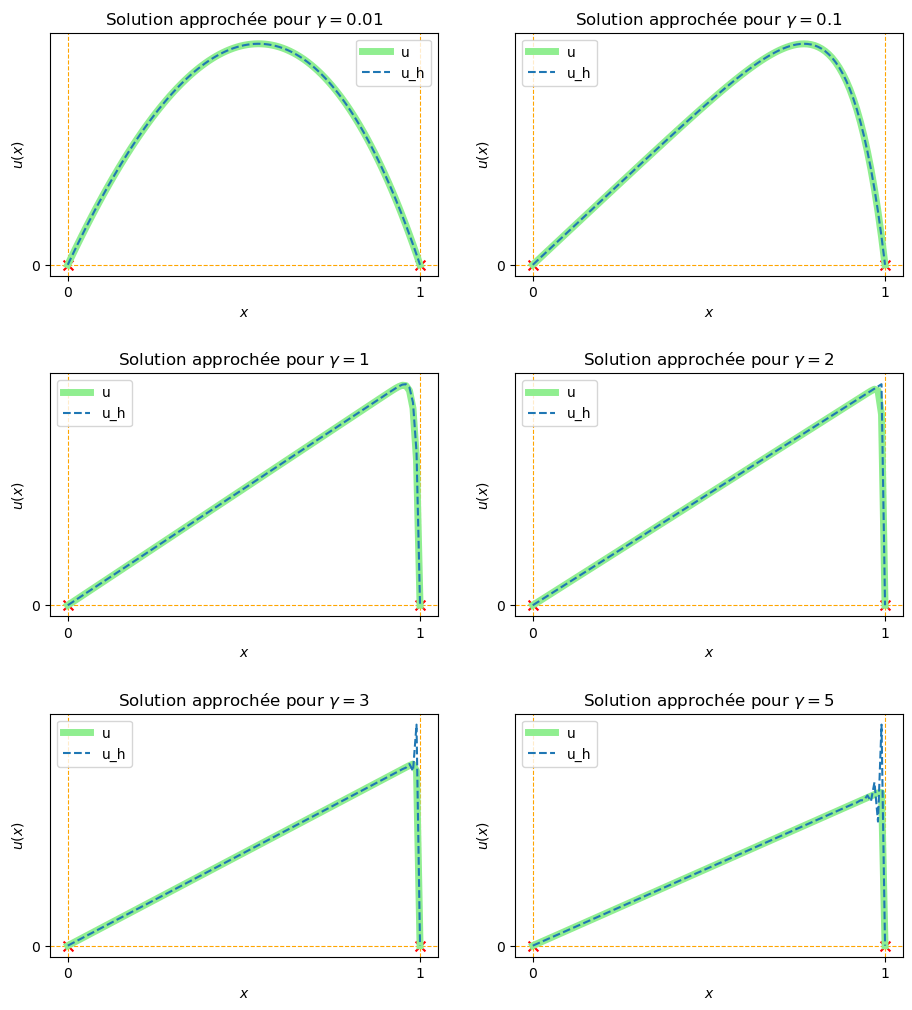

In [9]:
# h et beta fixés
h=0.01
beta=1
N=int((1-h)/h)

# Discrétisation de l'intervalle ]0,1[
x=np.linspace(0,1,N+2)

# Vecteur de valeurs de gamma à tester et valeurs de nu associées
gamma_vect=[0.01,0.1,1,2,3,5]
nu=[h*beta/0.01,h*beta/0.1,h*beta/1,h*beta/2,h*beta/3,h*beta/5]

# Affichages des solutions approchées pour ces valeurs de gamma

fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(11,12))

for i in range(6):

    plt.subplot(3,2,i+1)
    plt.plot(x,f(x,beta,nu[i]),label="u",color="lightgreen",linewidth=5)
    plt.plot(x,sol_approx(h,beta,gamma_vect[i]),label="u_h",linestyle='dashed')
    plt.legend()
    plt.title("Solution approchée pour "+r'$\gamma=$'+str(gamma_vect[i]))
    plt.grid(True,color='orange', linestyle='--')
    plt.scatter(0,0,color="red",s=50,marker="x")
    plt.scatter(1,0,color="red",s=50,marker="x")
    plt.ylabel("$u(x)$")
    plt.xlabel("$x$")
    plt.xticks([0,1], [0,1])
    plt.yticks([0],[0])

plt.subplots_adjust(hspace=0.4)
plt.show()

On remarque alors que pour $\gamma \geq 2$, la solution approchée devient instable.

**(6)** Soit $b : \Omega \to R, b(x) = sin(\pi x)$. Afin de pallier au problème d'instabilité mis en évidence à la question **(5)**, on propose de remplacer l'espace des fonctions test $V_h$ par un autre espace $W_h$, tout en gardant l’espace $V_h$ pour chercher la solution. On définit $W_h$ comme l'espace engendré par les fonctions $\Psi$ définies par :
$$\Psi_{i}^{h}(x) = \Phi_i^h(x) + \left \{
\begin{array}{l @{=} l}
    b\big{(}\frac{x-x_{i-1}}{h}\big{)}, \ si \ x\in [x_{i-1},x_i] \\
    -b\big{(}\frac{x-x_i}{h}\big{)}, \ si \ x\in [x_{i},x_{i+1}] \\
    0 , \ sinon
\end{array}
\right.$$

Les dérivées faibles sont données par: 
$$ (\Psi_{i}^{h})'(x) = (\Phi_{i}^{h})'(x) + \left \{
\begin{array}{l @{=} l}
    \frac{\pi}{h}cos(\frac{\pi(x-x_{i-1})}{h}), \ si \ x\in [x_{i-1},x_i] \\
    \frac{-\pi}{h}cos(\frac{\pi(x-x_{i})}{h}), \ si \ x\in [x_{i},x_{i+1}] \\
    0 , \ sinon
\end{array}
\right.$$


La solution $\bar{u}_h$ est obtenue en résolvant le problème suivant: trouver $\bar{u}_h \in V_h$ tq $\forall v_h \in W_h$ on ait : 

$$\begin{equation}
a(\bar{u}_h,v_h) = \int_{0}^{1}v_h = l(v_h)
\end{equation}$$ 

**<u>Remarque:</u>** La stratégie consistant à choisir des espaces différents pour la solution et pour les fonctions tests est connue sous le nom de méthode de *Petrov-Galerkin*.

Après avoir implémenté la méthode des éléments finis correspondant à ce nouveau choix d’espaces d'approximation, donner une représentation graphique de la solution approchée pour les même paramètres que ceux utilisés dans la question **(5)**. Comparer les solutions ainsi obtenues et commenter les résultats.

Si $\bar{u}_h \in V_h$, on rappelle que $\bar{u}_h$ s'écrit de la forme: $ \bar{u}_h = \sum\limits_{j=1}^{N}\bar{U}_{j}^{h}\Phi_{j}^{h}$, car 
$\{\Phi_1,\dots,\Phi_N \}$ est une base de $V_h$.

On sait d'après l'énoncé que $a(\bar{u}_h,v_h)=l(v_h), \forall v_h \in W_h$, en particulier, comme $\Psi_{j}^{h} \in W_h$, $ \forall 1 \leq j \leq N$, on a alors: 

$$\begin{equation}
a\big{(}\sum\limits_{j=1}^{N}\bar{U}_{j}^{h}\Phi_{j}^{h},\Psi_{i}^{h}\big{)} = l(\Psi_{i}^{h}), \ \forall 1 \leq i,j \leq N
\end{equation}$$ 

ce qui implique, par bilinéarité de $a$ que:  $$\begin{equation}
\sum\limits_{j=1}^{N}\bar{U}_{j}^{h} a(\Phi_{j}^{h},\Psi_{i}^{h}) = l(\Psi_{i}^{h}), \ \forall 1 \leq i,j \leq N
\end{equation}$$ 

En définissant $ \bar{U}_h= (\bar{U}_{j}^{h})_{1 \leq j \leq N}$, $A_h=\big{(}a(\Phi_{j}^{h},\Psi_{i}^{h})\big{)}_{1 \leq i,j \leq N}$ ainsi que $b_h=(l(\Psi_{i}^{h}))_{1 \leq i \leq N}$, le problème initial se ramène à la résolution d'un système linéaire de taille $N$ de la forme $A_h\bar{U}_h=b_h$, que l'on appelle formulation matricielle du problème **(0.1)**.

On peut alors trouver les coefficients de $A_h$ de la façon suivante:

$$\begin{equation}
\begin{split}
(A_h)_{i,j} & = \int_{0}^{1} [\nu (\Phi_{j}^{h})'(x)(\Psi_{i}^{h})'(x)+\beta (\Phi_{j}^{h})'(x)(\Psi_{i}^{h})(x)]dx \\
            & = 0, \ si \ |i-j|>1
\end{split}
\end{equation}$$

_**<u>Calcul des coefficients diagonaux de $A_h$:</u>**_

$$\begin{equation}
\begin{split}
(A_h)_{i,i} & = \int_{0}^{1} [\nu (\Phi_{i}^{h})'(x)(\Psi_{i}^{h})'(x)+\beta (\Phi_{i}^{h})'(x)(\Psi_{i}^{h})(x)]dx \\
            & = \int_{x_{i-1}}^{x_i} [\nu (\Phi_{i}^{h})'(x)(\Psi_{i}^{h})'(x)+\beta (\Phi_{i}^{h})'(x)(\Psi_{i}^{h})(x)]dx + \int_{x_i}^{x_{i+1}} [\nu (\Phi_{i}^{h})'(x)(\Psi_{i}^{h})'(x)+\beta (\Phi_{i}^{h})'(x)(\Psi_{i}^{h})(x)]dx \\
            & = \int_{x_{i-1}}^{x_i}\nu \frac{1}{h}\big{(}\frac{1}{h} + \frac{\pi}{h}cos(\frac{\pi(x-x_{i-1})}{h})\big{)}+\beta \frac{1}{h} \big{(}\frac{(x-x_{i-1})}{h}+sin(\frac{\pi(x-x_{i-1})}{h}\big{)}dx +  \int_{x_{i}}^{x_{i+1}}\nu \frac{-1}{h}\big{(}\frac{-1}{h} - \frac{\pi}{h}cos(\frac{\pi(x-x_{i})}{h})\big{)}+ \beta \frac{-1}{h} \big{(}\frac{(x_{i+1}-x)}{h}-sin(\frac{\pi(x-x_{i})}{h}\big{)}dx \\
            & = \frac{2\nu}{h} +\frac{4\beta}{\pi}
\end{split}
\end{equation}$$

après calculs de ces intégrales.

Les coefficients diagonaux de $A_h$ valent $\frac{2\nu}{h} +\frac{4\beta}{\pi}$.

_**<u>Calcul des coefficients sous-diagonaux de $A_h$:</u>**_

$$\begin{equation}
\begin{split}
(A_h)_{i,i-1} & = \int_{x_{i-1}}^{x_i} [\nu (\Phi_{i-1}^{h})'(x)(\Psi_{i}^{h})'(x)+\beta (\Phi_{i-1}^{h})'(x)(\Psi_{i}^{h})(x)]dx \\ 
              & = \int_{x_{i-1}}^{x_i}\nu \frac{-1}{h}\big{(}\frac{1}{h} + \frac{\pi}{h}cos(\frac{\pi(x-x_{i-1})}{h})\big{)}+\beta \frac{-1}{h} \big{(}\frac{(x-x_{i-1})}{h}+sin(\frac{\pi(x-x_{i-1})}{h}\big{)}dx \\
              & = -\frac{\nu}{h} -\frac{\beta}{2}-\frac{2\beta}{\pi}
\end{split}
\end{equation}$$

après calculs de ces intégrales.

Les coefficients sous-diagonaux de $A_h$ valent $-\frac{\nu}{h} -\frac{\beta}{2}-\frac{2\beta}{\pi}$.

_**<u>Calcul des coefficients sur-diagonaux de $A_h$:</u>**_

$$\begin{equation}
\begin{split}
(A_h)_{i,i+1} & = \int_{x_{i}}^{x_{i+1}} [\nu (\Phi_{i+1}^{h})'(x)(\Psi_{i}^{h})'(x)+\beta (\Phi_{i+1}^{h})'(x)(\Psi_{i}^{h})(x)]dx \\ 
              & = \int_{x_{i}}^{x_{i+1}}\nu \frac{1}{h}\big{(}\frac{-1}{h} - \frac{\pi}{h}cos(\frac{\pi(x-x_{i})}{h})\big{)}+\beta \frac{1}{h} \big{(}\frac{(x_{i+1}-x)}{h}-sin(\frac{\pi(x-x_{i})}{h}\big{)}dx \\
              & = -\frac{\nu}{h} +\frac{\beta}{2}-\frac{2\beta}{\pi}
\end{split}
\end{equation}$$

après calculs de ces intégrales.

Les coefficients sur-diagonaux de $A_h$ valent $-\frac{\nu}{h} +\frac{\beta}{2}-\frac{2\beta}{\pi}$.

On se rend compte facilement du fait que les coefficients de $b_h$ valent tous $h$ à nouveau, car lorsque l'on calcule $l(\Psi_{i}^{h})=\int_0^1\Psi_{i}^{h}dx$, les nouveaux termes apportés par $\Psi_{i}^{h}$ en plus de $\Phi_{i}^{h}$ s'annulent entre eux.

Pour conclure, on a donc:
$$A_h=\begin{pmatrix}
\frac{2 \nu}{h}+\frac{4\beta}{\pi}&-\frac{\nu}{h} +\frac{\beta}{2}-\frac{2\beta}{\pi}&0&\dots&0\\
-\frac{\nu}{h} -\frac{\beta}{2}-\frac{2\beta}{\pi}&\ddots&\ddots&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&\ddots&\ddots&-\frac{\nu}{h} +\frac{\beta}{2}-\frac{2\beta}{\pi}\\
0&\dots&0&-\frac{\nu}{h} -\frac{\beta}{2}-\frac{2\beta}{\pi}&\frac{2 \nu}{h}+\frac{4\beta}{\pi}
\end{pmatrix},b_h=\begin{pmatrix}h\\\vdots\\\vdots\\\vdots\\h\end{pmatrix}$$

Implémentons maintenant une nouvelle fonction `sol_approx_2` qui nous retourne la solution approchée `U_h`pour des valeurs de $h$, $\beta$ et $\gamma$ données, via la méthode de *Petrov-Galerkin*.

In [10]:
def sol_approx_2(h,beta,gamma):

    # Définition des valeurs des paramètres
    h=h
    N=int((1-h)/h)
    beta=beta
    gamma=gamma
    nu=h*beta/gamma

    # Implémentation de la matrice A_h et du vecteur b_h
    b_h=h*np.ones((N))

    # Coefficient diagonal de la matrice A_h
    a_N=(2*nu)/h +(4*beta)/np.pi

    # Coefficients sur/sous diagonaux de la matrice A_h
    b_N1=-(nu/h)-(beta/2)-(2*beta)/np.pi
    b_N2=-(nu/h)+(beta/2)-(2*beta)/np.pi

    # Initialisation de la matrice A_h et de la solution U_h
    A_h=a_N*np.eye(N)
    U_h=np.zeros(N+2)

    # Conditions aux bords de Dirichlet homogènes
    U_h[0]=0
    U_h[N+1]=0

    # Remplissage de la matrice A_h
    for i in range(1,N-1):
        A_h[i,i-1]=b_N1
        A_h[i,i+1]=b_N2

    A_h[0,1]= b_N2
    A_h[N-1,N-2]=b_N1

    # Résolution de A_h@U_h=b_h à l'intérieur du domaine ]0,1[
    U_h[1:-1]=np.linalg.solve(A_h,b_h)
    
    return U_h

Affichons les solutions approchées pour différentes valeurs de $\gamma$ obtenues à l'aide de la méthode de *Petrov-Galerkin* cette fois-ci.

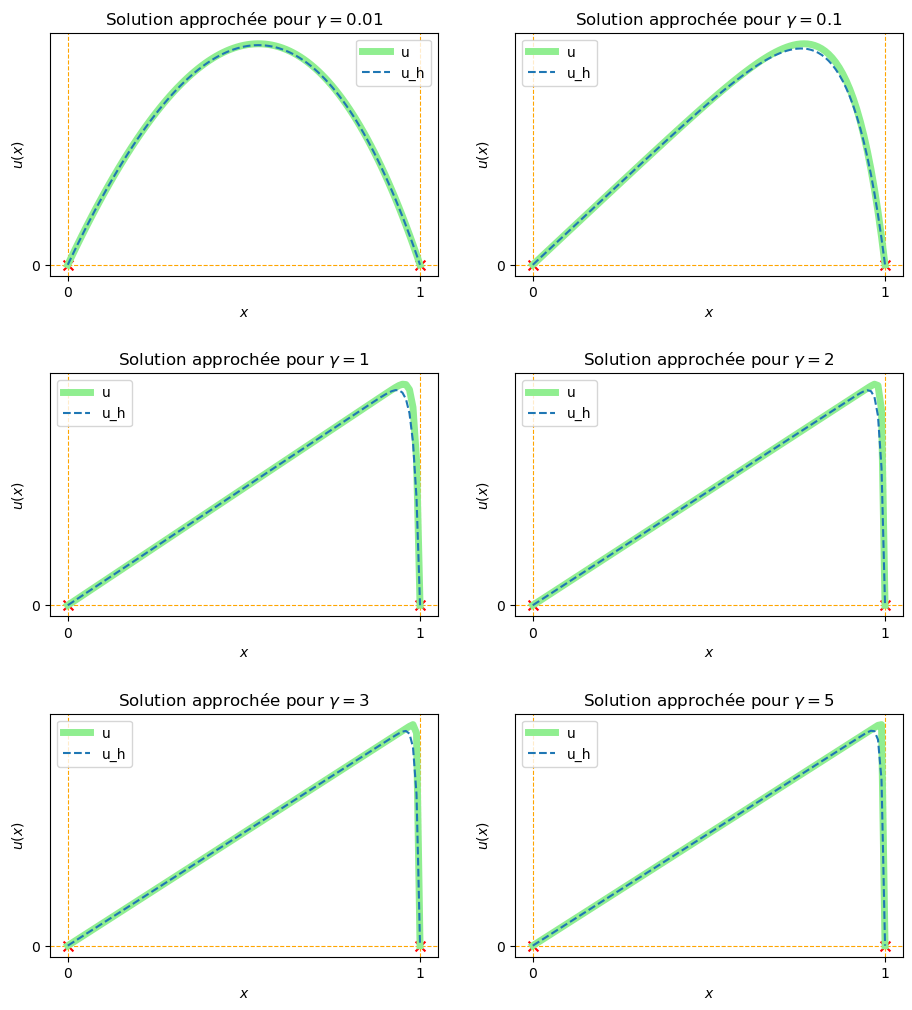

In [11]:
# h et beta fixés
h=0.01
beta=1
N=int((1-h)/h)

# Discrétisation de l'intervalle ]0,1[
x=np.linspace(0,1,N+2)

# Vecteur de valeurs de gamma
gamma_vect=[0.01,0.1,1,2,3,5]
nu=[h*beta/0.01,h*beta/0.1,h*beta/1,h*beta/2,h*beta/3,h*beta/5]

# Affichages des solutions approchées pour ces valeurs de gamma

fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(11,12))

for i in range(6):

    plt.subplot(3,2,i+1)
    plt.plot(x,f(x,beta,nu[i]),label="u",color="lightgreen",linewidth=5)
    plt.plot(x,sol_approx_2(h,beta,gamma_vect[i]),label="u_h",linestyle='dashed')
    plt.legend()
    plt.title("Solution approchée pour "+r'$\gamma=$'+str(gamma_vect[i]))
    plt.grid(True,color='orange', linestyle='--')
    plt.scatter(0,0,color="red",s=50,marker="x")
    plt.scatter(1,0,color="red",s=50,marker="x")
    plt.ylabel("$u(x)$")
    plt.xlabel("$x$")
    plt.xticks([0,1], [0,1])
    plt.yticks([0],[0])

plt.subplots_adjust(hspace=0.4)
plt.show()

_**<u>Conclusion:</u>**_ On constate que l'approximation en utilisant la méthode de *Petrov-Galerkin* est très satisfaisante dans notre cas. 

En effet, on peut voir dans un premier temps que la solution aprochée pour des petites valeurs de $\gamma$ est très fiable. Par ailleurs, pour des valeurs de $\gamma$ plus grandes et ce même pour des valeurs de $\gamma \geq 2$, la solution approchée continue d'être fiable et n'explose jamais, contrairement à la solution approchée obtenue avec la première méthode utilisée dans ce projet, qui n'était pas convaincante dans ce cas de figure ci.

La stratégie consistant à choisir des espaces différents pour la solution et pour les fonctions tests via les espaces $V_h$ et $W_h$ que l'on a utilisé a donc porté ses fruits.

### <u>Complément / Piste:</u> Proposition d'un choix de $b(x)$ pour l'espace $W_h$, meilleur au sens de l'erreur d'approximation?

_**<u>Motivation:</u>**_ Bien que très correcte, l'approximation via méthode de *Petrov-Galerkin* en utilisant l'espace $W_h $ proposé n'est pas parfaite. En effet la solution approchée via cette méthode n'explose pas pour des valeurs de $\gamma \geq 2$ donc nous sommes satisfaits, mais l'erreur d'approximation reste quand même conséquente, notamment pour des valeurs telles que $\gamma =5 $, comme nous le montre le calcul suivant:

Calcul de l'écart en norme $L^2$ entre la solution exacte et la solution approchée via méthode de *Petrov-Galerkin* pour $\gamma = 5$:

In [12]:
print("L'erreur vaut: "+str(np.linalg.norm(f(x,beta,nu[5])-sol_approx_2(h,beta,gamma_vect[5]))))

L'erreur vaut: 0.25370545922535465


_**<u>Solution:</u>**_ En proposant comme fonction $b(x)$ la fonction $b : \Omega \to R, b(x) = \frac{1}{2}sin(\pi x)$. Ainsi que le même espace $W_h$ que précédemment, on va pouvoir constater que l'erreur d'estimation devient bien meilleure. 

La matrice $A_h$ et le vecteur $b_h$ associés au problème dans ce nouveau cas prennent la forme suivante:

$$A_h=\begin{pmatrix}
\frac{2 \nu}{h}+\frac{2\beta}{\pi}&-\frac{\nu}{h} +\frac{\beta}{2}-\frac{\beta}{\pi}&0&\dots&0\\
-\frac{\nu}{h} -\frac{\beta}{2}-\frac{\beta}{\pi}&\ddots&\ddots&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&\ddots&\ddots&-\frac{\nu}{h} +\frac{\beta}{2}-\frac{\beta}{\pi}\\
0&\dots&0&-\frac{\nu}{h} -\frac{\beta}{2}-\frac{\beta}{\pi}&\frac{2 \nu}{h}+\frac{2\beta}{\pi}
\end{pmatrix},b_h=\begin{pmatrix}h\\\vdots\\\vdots\\\vdots\\h\end{pmatrix}$$

Implémentons alors une nouvelle fonction `sol_approx_final` qui nous retourne la solution approchée `U_h`pour des valeurs de $h$, $\beta$ et $\gamma$ données, via la méthode de *Petrov-Galerkin* avec le nouveau choix de $b(x)$.

In [13]:
def sol_approx_final(h,beta,gamma):

    # Définition des valeurs des paramètres
    h=h
    N=int((1-h)/h)
    beta=beta
    gamma=gamma
    nu=h*beta/gamma

    # Implémentation de la matrice A_h et du vecteur b_h
    b_h=h*np.ones((N))

    # Coefficient diagonal de la matrice A_h
    a_N=(2*nu)/h +(2*beta)/np.pi

    # Coefficients sur/sous diagonaux de la matrice A_h
    b_N1=-(nu/h)-(beta/2)-(beta)/np.pi
    b_N2=-(nu/h)+(beta/2)-(beta)/np.pi

    # Initialisation de la matrice A_h et de la solution U_h
    A_h=a_N*np.eye(N)
    U_h=np.zeros(N+2)

    # Conditions aux bords de Dirichlet homogènes
    U_h[0]=0
    U_h[N+1]=0

    # Remplissage de la matrice A_h
    for i in range(1,N-1):
        A_h[i,i-1]=b_N1
        A_h[i,i+1]=b_N2

    A_h[0,1]= b_N2
    A_h[N-1,N-2]=b_N1

    # Résolution de A_h@U_h=b_h à l'intérieur du domaine ]0,1[
    U_h[1:-1]=np.linalg.solve(A_h,b_h)
    
    return U_h

Affichons alors les solutions approchées (pour les mêmes valeurs de $\gamma$ que précédement) obtenues à l'aide de la méthode de *Petrov-Galerkin* avec le nouveau choix de $b(x)$ cette fois-ci.

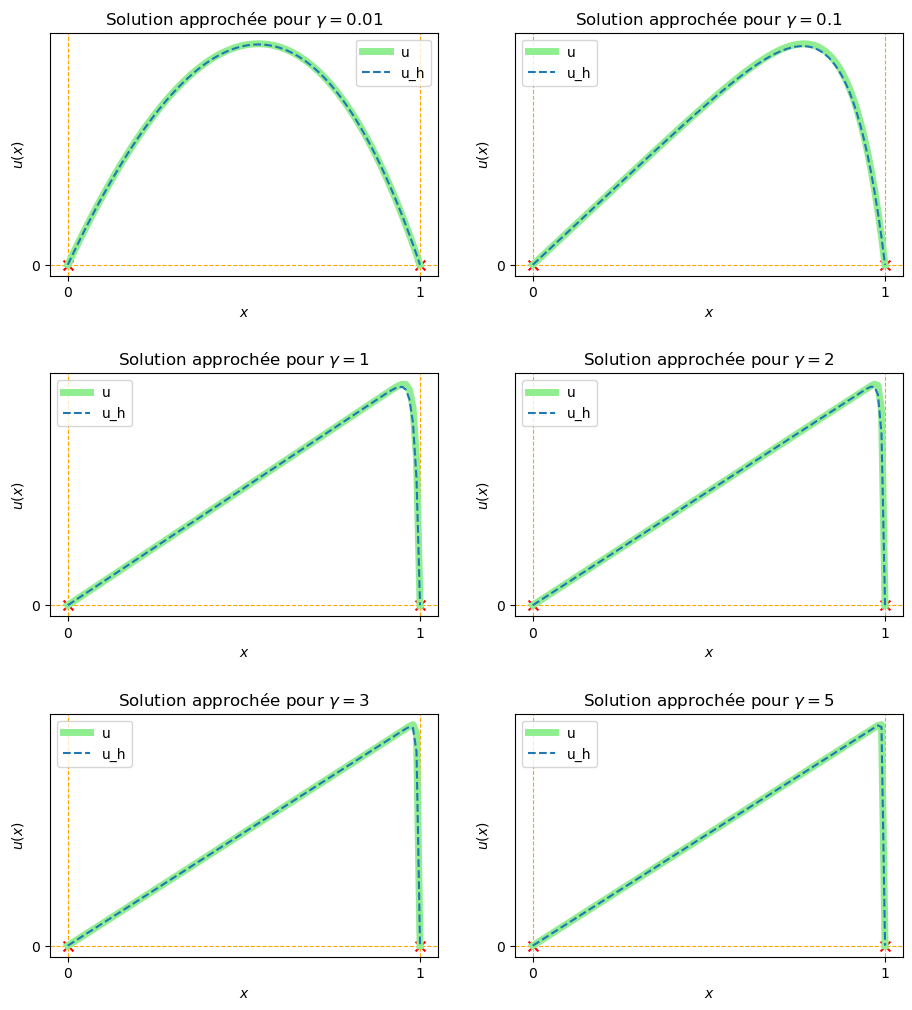

In [14]:
# h et beta fixés
h=0.01
beta=1
N=int((1-h)/h)

# Discrétisation de l'intervalle ]0,1[
x=np.linspace(0,1,N+2)

# Vecteur de valeurs de gamma
gamma_vect=[0.01,0.1,1,2,3,5]
nu=[h*beta/0.01,h*beta/0.1,h*beta/1,h*beta/2,h*beta/3,h*beta/5]

# Affichages des solutions approchées pour ces valeurs de gamma

fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(11,12))

for i in range(6):

    plt.subplot(3,2,i+1)
    plt.plot(x,f(x,beta,nu[i]),label="u",color="lightgreen",linewidth=5)
    plt.plot(x,sol_approx_final(h,beta,gamma_vect[i]),label="u_h",linestyle='dashed')
    plt.legend()
    plt.title("Solution approchée pour "+r'$\gamma=$'+str(gamma_vect[i]))
    plt.grid(True,color='orange', linestyle='--')
    plt.scatter(0,0,color="red",s=50,marker="x")
    plt.scatter(1,0,color="red",s=50,marker="x")
    plt.ylabel("$u(x)$")
    plt.xlabel("$x$")
    plt.xticks([0,1], [0,1])
    plt.yticks([0],[0])

plt.subplots_adjust(hspace=0.4)
plt.show()

Visuellement, on constate que l'avantage de la non-explosion de la deuxième méthode est conservé, et qu'en plus, on a une approximation plus fiable de la solution exacte et ce pour n'importe quelle valeur de $\gamma$.

On peut confirmer nos dires via calcul du risque $L^2$:

In [15]:
print("L'erreur vaut: "+str(np.linalg.norm(f(x,beta,nu[5])-sol_approx_final(h,beta,gamma_vect[5]))))

L'erreur vaut: 0.011246150832622134


On constate que l'erreur d'estimation via cette nouvelle méthode est bien plus faible que pour la précédenten le choix de $b(x)$ semble intéressant.